In [ ]:
#Mount drive to collect data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Import Important Library

import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
#Read Data
data = pd.read_csv(r"/content/drive/MyDrive/Studies/Master/Y1S1/ML/Assignment/data_Set2.csv")

In [4]:
#Preview Data
data

,RATE,FETURE_01,FETURE_02,FETURE_03,FETURE_04,FETURE_05,FETURE_06,FETURE_07,FETURE_08,FETURE_09,...,FETURE_242,FETURE_243,FETURE_244,FETURE_245,FETURE_246,FETURE_247,FETURE_248,FETURE_249,FETURE_250,Unnamed: 251
0,117,0.013965,-0.025446,-0.061522,-0.091379,-0.113412,-0.127488,-0.134760,-0.137213,-0.137095,...,-0.308597,-0.339569,-0.369337,-0.398512,-0.427136,-0.454264,-0.477632,-0.493602,-0.497567,NaN
1,118,-0.484849,-0.451953,-0.397845,-0.324812,-0.238533,-0.147200,-0.059856,0.015568,0.073918,...,0.468037,0.550039,0.625958,0.691141,0.740157,0.768417,0.773521,0.755914,0.718728,NaN
2,121,0.666901,0.605905,0.540472,0.473663,0.406477,0.338025,0.266121,0.188072,0.101480,...,0.083920,0.170374,0.249839,0.321893,0.384940,0.436163,0.472148,0.489958,0.488226,NaN
3,119,0.467878,0.432166,0.385965,0.334548,0.282211,0.231199,0.181242,0.129874,0.073427,...,0.601036,0.556172,0.499217,0.433026,0.360172,0.282794,0.202605,0.120994,0.039169,NaN
4,122,-0.041698,-0.120364,-0.195525,-0.265970,-0.330849,-0.389950,-0.443787,-0.493371,-0.539638,...,-0.325906,-0.398952,-0.465390,-0.521747,-0.562725,-0.582097,-0.574187,-0.535460,-0.465734,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,132,-0.820881,-0.638517,-0.426145,-0.203122,0.017412,0.227060,0.419008,0.584785,0.712471,...,1.057505,1.208974,1.328825,1.414703,1.465564,1.481033,1.460696,1.403628,1.308465,NaN
16671,143,1.174186,1.001445,0.794053,0.560035,0.311803,0.065275,-0.161943,-0.352900,-0.493684,...,1.317151,1.059098,0.797616,0.538762,0.286488,0.044802,-0.180322,-0.380317,-0.545241,NaN
16672,161,-0.666616,-0.740905,-0.772292,-0.773555,-0.764390,-0.767356,-0.802350,-0.881047,-1.002849,...,-0.692958,-0.619339,-0.511855,-0.376556,-0.221001,-0.053081,0.120279,0.294391,0.467698,NaN
16673,56,0.641815,0.820421,1.007089,1.202633,1.402911,1.597992,1.773240,1.912134,2.000033,...,-0.058113,-0.219366,-0.490463,-0.862713,-1.306676,-1.775662,-2.214254,-2.569450,-2.801059,NaN


In [5]:
#Rename column,not affecting data
data.rename(columns = {'RATE':'Rate'}, inplace = True)
   

In [6]:
#Remove null value,just in case
data = data.dropna(how='all')
data = data.astype(float)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data

,Rate,FETURE_01,FETURE_02,FETURE_03,FETURE_04,FETURE_05,FETURE_06,FETURE_07,FETURE_08,FETURE_09,...,FETURE_242,FETURE_243,FETURE_244,FETURE_245,FETURE_246,FETURE_247,FETURE_248,FETURE_249,FETURE_250,Unnamed: 251
0,117.0,0.013965,-0.025446,-0.061522,-0.091379,-0.113412,-0.127488,-0.134760,-0.137213,-0.137095,...,-0.308597,-0.339569,-0.369337,-0.398512,-0.427136,-0.454264,-0.477632,-0.493602,-0.497567,NaN
1,118.0,-0.484849,-0.451953,-0.397845,-0.324812,-0.238533,-0.147200,-0.059856,0.015568,0.073918,...,0.468037,0.550039,0.625958,0.691141,0.740157,0.768417,0.773521,0.755914,0.718728,NaN
2,121.0,0.666901,0.605905,0.540472,0.473663,0.406477,0.338025,0.266121,0.188072,0.101480,...,0.083920,0.170374,0.249839,0.321893,0.384940,0.436163,0.472148,0.489958,0.488226,NaN
3,119.0,0.467878,0.432166,0.385965,0.334548,0.282211,0.231199,0.181242,0.129874,0.073427,...,0.601036,0.556172,0.499217,0.433026,0.360172,0.282794,0.202605,0.120994,0.039169,NaN
4,122.0,-0.041698,-0.120364,-0.195525,-0.265970,-0.330849,-0.389950,-0.443787,-0.493371,-0.539638,...,-0.325906,-0.398952,-0.465390,-0.521747,-0.562725,-0.582097,-0.574187,-0.535460,-0.465734,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,132.0,-0.820881,-0.638517,-0.426145,-0.203122,0.017412,0.227060,0.419008,0.584785,0.712471,...,1.057505,1.208974,1.328825,1.414703,1.465564,1.481033,1.460696,1.403628,1.308465,NaN
16671,143.0,1.174186,1.001445,0.794053,0.560035,0.311803,0.065275,-0.161943,-0.352900,-0.493684,...,1.317151,1.059098,0.797616,0.538762,0.286488,0.044802,-0.180322,-0.380317,-0.545241,NaN
16672,161.0,-0.666616,-0.740905,-0.772292,-0.773555,-0.764390,-0.767356,-0.802350,-0.881047,-1.002849,...,-0.692958,-0.619339,-0.511855,-0.376556,-0.221001,-0.053081,0.120279,0.294391,0.467698,NaN
16673,56.0,0.641815,0.820421,1.007089,1.202633,1.402911,1.597992,1.773240,1.912134,2.000033,...,-0.058113,-0.219366,-0.490463,-0.862713,-1.306676,-1.775662,-2.214254,-2.569450,-2.801059,NaN


In [7]:
#Get X and y/X = Input y = target
X = data.drop(['Rate'], axis=1)
y = data[['Rate']]
X

,FETURE_01,FETURE_02,FETURE_03,FETURE_04,FETURE_05,FETURE_06,FETURE_07,FETURE_08,FETURE_09,FETURE_10,...,FETURE_242,FETURE_243,FETURE_244,FETURE_245,FETURE_246,FETURE_247,FETURE_248,FETURE_249,FETURE_250,Unnamed: 251
0,0.013965,-0.025446,-0.061522,-0.091379,-0.113412,-0.127488,-0.134760,-0.137213,-0.137095,-0.136428,...,-0.308597,-0.339569,-0.369337,-0.398512,-0.427136,-0.454264,-0.477632,-0.493602,-0.497567,NaN
1,-0.484849,-0.451953,-0.397845,-0.324812,-0.238533,-0.147200,-0.059856,0.015568,0.073918,0.113678,...,0.468037,0.550039,0.625958,0.691141,0.740157,0.768417,0.773521,0.755914,0.718728,NaN
2,0.666901,0.605905,0.540472,0.473663,0.406477,0.338025,0.266121,0.188072,0.101480,0.004914,...,0.083920,0.170374,0.249839,0.321893,0.384940,0.436163,0.472148,0.489958,0.488226,NaN
3,0.467878,0.432166,0.385965,0.334548,0.282211,0.231199,0.181242,0.129874,0.073427,0.008441,...,0.601036,0.556172,0.499217,0.433026,0.360172,0.282794,0.202605,0.120994,0.039169,NaN
4,-0.041698,-0.120364,-0.195525,-0.265970,-0.330849,-0.389950,-0.443787,-0.493371,-0.539638,-0.582656,...,-0.325906,-0.398952,-0.465390,-0.521747,-0.562725,-0.582097,-0.574187,-0.535460,-0.465734,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,-0.820881,-0.638517,-0.426145,-0.203122,0.017412,0.227060,0.419008,0.584785,0.712471,0.787202,...,1.057505,1.208974,1.328825,1.414703,1.465564,1.481033,1.460696,1.403628,1.308465,NaN
16671,1.174186,1.001445,0.794053,0.560035,0.311803,0.065275,-0.161943,-0.352900,-0.493684,-0.575387,...,1.317151,1.059098,0.797616,0.538762,0.286488,0.044802,-0.180322,-0.380317,-0.545241,NaN
16672,-0.666616,-0.740905,-0.772292,-0.773555,-0.764390,-0.767356,-0.802350,-0.881047,-1.002849,-1.153646,...,-0.692958,-0.619339,-0.511855,-0.376556,-0.221001,-0.053081,0.120279,0.294391,0.467698,NaN
16673,0.641815,0.820421,1.007089,1.202633,1.402911,1.597992,1.773240,1.912134,2.000033,2.027641,...,-0.058113,-0.219366,-0.490463,-0.862713,-1.306676,-1.775662,-2.214254,-2.569450,-2.801059,NaN


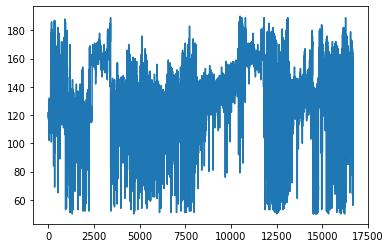

In [8]:
#Plot to check is there any problem
plt.plot(y["Rate"], label = 'Y_Train')
plt.show()

In [12]:
#Format X and y as Float 
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

#Perform a 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#MinMax Scale/Normalize the X data
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Grid Search CV for XGB Regressor

In [14]:
# Define the XGBoost model
xgb = XGBRegressor()

# Define the parameter grid
param_grid = {'n_estimators': [300,500],
              'learning_rate': [0.1, 0.01],
              'subsample': [0.3]}

# Create the grid search object
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[13:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.1, 'n_estimators': 300, 'subsample': 0.3}


## Fitting the model
After getting the parameters desired,we run a K-5 fold cross validation and create SVR and XGB model with parameter that we get to compare the model output

In [15]:


# Define the number of folds
k = 5
MSE = mean_squared_error
SVR = SVR()
# Define the k-fold cross-validation object
kf = KFold(n_splits=k)

# Initialize an empty list to store the scores
xgb_mae_list,xgb_rmse_list,xgb_mse_list = [],[],[]
svr_mae_list,svr_rmse_list,svr_mse_list = [],[],[]
# Loop through the splits
for train_index, val_index in kf.split(X_train):
    # Extract the training and validation data
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

    X_train_cv[np.isnan(X_train_cv)] = 0
    y_train_cv[np.isnan(y_train_cv)] = 0
    X_val_cv[np.isnan(X_val_cv)] = 0
    y_val_cv[np.isnan(y_val_cv)] = 0
    
    # Create an XGBoost model
    xgb = XGBRegressor(learning_rate=0.1, n_estimators=300, subsample=0.3,objective ='reg:squarederror')
    model = xgb
    # fit the SVR model on the training data
    
    SVR.fit(X_train_cv,y_train_cv)

    # Fit the model on the training data
    model.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation data
    y_pred = model.predict(X_val_cv)
    svr_y_pred = SVR.predict(X_val_cv)

    # Calculate the score for this fold
    mae = mean_absolute_error(y_val_cv, y_pred)
    mse = MSE(y_val_cv,y_pred)
    rmse = np.sqrt(MSE(y_val_cv,y_pred))
    svr_mae = mean_absolute_error(y_val_cv, svr_y_pred)
    svr_mse = MSE(y_val_cv,svr_y_pred)
    svr_rmse = np.sqrt(MSE(y_val_cv,svr_y_pred))

    # Append the score to the list
    xgb_mae_list.append(mae)
    xgb_mse_list.append(mse)
    xgb_rmse_list.append(rmse)
    svr_mae_list.append(svr_mae)
    svr_mse_list.append(svr_mse)
    svr_rmse_list.append(svr_rmse)

# Print the mean score across all folds
print("XGB Mean MAE:", np.mean(xgb_mae_list))
print("XGB Mean MSE:", np.mean(xgb_mse_list))
print("XGB Mean RMSE:", np.mean(xgb_rmse_list))
print("SVR Mean MAE:", np.mean(svr_mae_list))
print("SVR Mean MSE:", np.mean(svr_mse_list))
print("SVR Mean RMSE:", np.mean(svr_rmse_list))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

XGB Mean MAE: 12.726856
XGB Mean MSE: 410.83057
XGB Mean RMSE: 20.259323
SVR Mean MAE: 16.63054215384758
SVR Mean MSE: 544.5806201114133
SVR Mean RMSE: 23.329070702216345


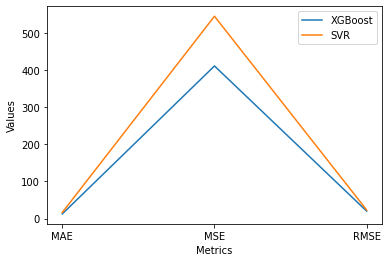

In [16]:
#Make mean a variable
xgb_mae = np.mean(xgb_mae_list)
xgb_mse = np.mean(xgb_mse_list)
xgb_rmse = np.mean(xgb_rmse_list)
svr_mae = np.mean(svr_mae_list)
svr_mse = np.mean(svr_mse_list)
svr_rmse = np.mean(svr_rmse_list)

metrics = ['MAE', 'MSE', 'RMSE']
xgb_values = [xgb_mae, xgb_mse, xgb_rmse]
svr_values = [svr_mae, svr_mse, svr_rmse]

#Plot those results side by side
plt.plot(metrics, xgb_values, label='XGBoost')
plt.plot(metrics, svr_values, label='SVR')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.legend()
plt.show()

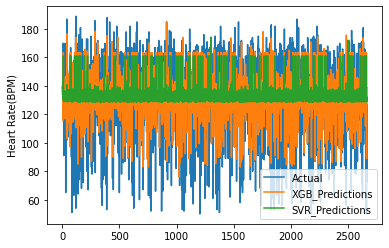

In [19]:
# y_pred = xgb_r.predict(X_test)

# Plot the predictions and actual values
plt.plot(y_val_cv, label='Actual')
plt.plot(y_pred, label='XGB_Predictions')
plt.plot(svr_y_pred, label='SVR_Predictions')

plt.ylabel('Heart Rate(BPM)')
plt.legend()
plt.show()